### 1
Выберите наборы данных. которые можно интерпретировать, как временные ряды:
а) зависимость цены на недвижимость в еонкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

Ответ: все наборы данных так или иначе можно интерпретировать как временные ряды, т.к. от времени частично зависит результат

### 2
вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).



In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import seaborn as sns

from sklearn.metrics import mean_squared_error


C:\Users\carbo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
COVID_ = pd.read_csv('https://d2xzmw6cctk25h.cloudfront.net/asset/1918126/attachment/bc08a884fbd8a562f7d9f5bff8357478.csv')
COVID_.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']).dt.date

In [5]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

C:\Users\carbo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [6]:
COVID.tail(30)

Confirmed   Deaths  Recovered
Data       Country/Region                                     
2020-05-10 Spain                  224350.0  26621.0   136166.0
           Sri Lanka                 863.0      9.0      321.0
           Sudan                    1365.0     70.0      149.0
           Suriname                   10.0      1.0        9.0
           Sweden                  26322.0   3225.0     4971.0
           Switzerland             30305.0   1833.0    26600.0
           Syria                      47.0      3.0       29.0
           Taiwan                    440.0      6.0      366.0
           Tajikistan                612.0     20.0        0.0
           Tanzania                  509.0     21.0      183.0
           Thailand                 3009.0     56.0     2794.0
           Timor-Leste                24.0      0.0       21.0
           Togo                      174.0     11.0       89.0
           Trinidad and Tobago       116.0      8.0      107.0
           Tunisia                  1032.0     45.0      700.0
           Turkey                 138657.0   3786.0    92691.0
           UK                     220449.0  31930.0     1002.0
           US                    1329260.0  79526.0   216169.0
           Uganda                    121.0      0.0       55.0
           Ukraine                 15232.0    391.0     3060.0
           United Arab Emirates    18198.0    198.0     4804.0
           Uruguay                   707.0     19.0      517.0
           Uzbekistan               2418.0     10.0     1881.0
           Venezuela                 414.0     10.0      193.0
           Vietnam                   288.0      0.0      241.0
           West Bank and Gaza        375.0      2.0      263.0
           Western Sahara              6.0      0.0        5.0
           Yemen                      51.0      8.0        1.0
           Zambia                    267.0      7.0      117.0
           Zimbabwe                   36.0      4.0        9.0

In [8]:
COVID_.loc[COVID_['Country/Region'] == 'Sweden', 'Country/Region'].value_counts()

Sweden    101
Name: Country/Region, dtype: int64

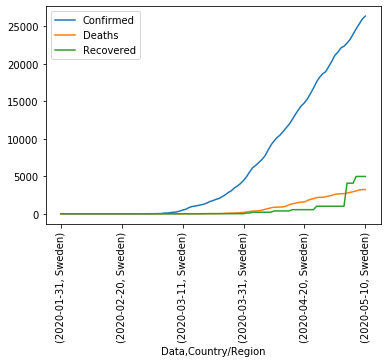

In [9]:
COVID.loc[COVID.index.get_level_values('Country/Region')=='Sweden', ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

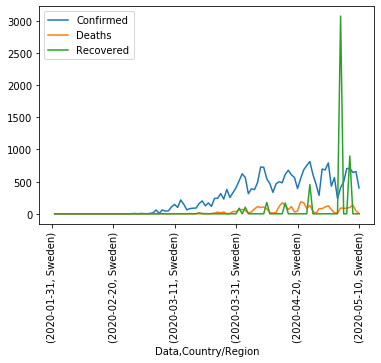

In [10]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Sweden', ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

##### Признаки

In [11]:
X1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Sweden', ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0

In [12]:
X2 = COVID.loc[COVID.index.get_level_values( 'Country/Region')=='Sweden', ['Confirmed','Deaths','Recovered']].values 

In [13]:
X1.shape

(101, 3)

In [14]:
X2.shape

(101, 3)

In [15]:
X3 = COVID.iloc[COVID.index.get_level_values( 'Country/Region')=='Sweden'].index.get_level_values( 'Data')

In [17]:
X3

Index([2020-01-31, 2020-02-01, 2020-02-02, 2020-02-03, 2020-02-04, 2020-02-05,
       2020-02-06, 2020-02-07, 2020-02-08, 2020-02-09,
       ...
       2020-05-01, 2020-05-02, 2020-05-03, 2020-05-04, 2020-05-05, 2020-05-06,
       2020-05-07, 2020-05-08, 2020-05-09, 2020-05-10],
      dtype='object', name='Data', length=101)

In [18]:
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear

In [19]:
XX = np.concatenate([X1,X2], axis= 1)

In [20]:
XX = np.concatenate([XX,np.array(X3_1).reshape((XX.shape[0],1))], axis= 1)

In [21]:
XX = np.concatenate([XX,np.array(X3_2).reshape((XX.shape[0],1))], axis= 1)

In [22]:
XX.shape

(101, 8)

In [23]:
COVID_Data = pd.DataFrame(data= XX, index= X3)

In [24]:
COVID_Data.head()

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-01-31,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0
2020-02-01,0.0,0.0,0.0,1.0,0.0,0.0,5.0,1.0
2020-02-02,0.0,0.0,0.0,1.0,0.0,0.0,6.0,2.0
2020-02-03,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
2020-02-04,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0


In [25]:
COVID_Data.tail()

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-05-06,702.0,87.0,0.0,23918.0,2941.0,4074.0,2.0,96.0
2020-05-07,705.0,99.0,897.0,24623.0,3040.0,4971.0,3.0,97.0
2020-05-08,642.0,135.0,0.0,25265.0,3175.0,4971.0,4.0,98.0
2020-05-09,656.0,45.0,0.0,25921.0,3220.0,4971.0,5.0,99.0
2020-05-10,401.0,5.0,0.0,26322.0,3225.0,4971.0,6.0,100.0


In [26]:
p = 10 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем

In [27]:
y = COVID_Data.iloc[h+p:,3]
y

Data
2020-02-11        1.0
2020-02-12        1.0
2020-02-13        1.0
2020-02-14        1.0
2020-02-15        1.0
               ...   
2020-05-06    23918.0
2020-05-07    24623.0
2020-05-08    25265.0
2020-05-09    25921.0
2020-05-10    26322.0
Name: 3, Length: 90, dtype: float64

In [28]:
X =[]
for i in range(len(y)):
    xx = XX[i:i+p,:]
    X.append(xx.reshape(8*p))

In [29]:
X = np.array(X).reshape((COVID_Data.shape[0]-p-h,8*p))
y=np.array(y).reshape((COVID_Data.shape[0]-p-h,1))

In [30]:
X.shape

(90, 80)

In [31]:
y.shape

(90, 1)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

N=-10
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]
# пока строим одну
model_lb = LinearRegression()

In [33]:
model_lb.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = model_lb.predict(x_test)
y_pred_t = model_lb.predict(x_train)

In [35]:
error_ =np.mean(np.abs(y_pred-y_test))
print(error_)

2668.3133152713826


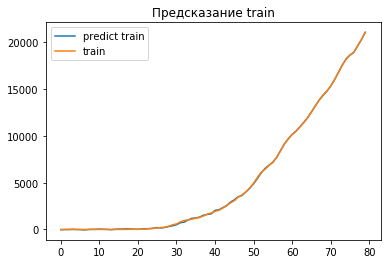

In [36]:
plt.plot(y_pred_t, label='predict train')
plt.plot(y_train, label='train')
plt.legend()
plt.title('Предсказание train')
plt.show()

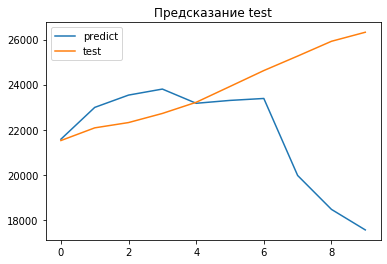

In [37]:
plt.plot(y_pred, label='predict')
plt.plot(y_test, label='test')
plt.legend()
plt.title('Предсказание test')
plt.show()

In [38]:
error_p =np.mean(np.abs(y_pred-y_test)/y_test)*100

print('error in MAPE :', error_p, '%')

error in MAPE : 10.542844766006802 %


### 3
вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )



In [39]:
brent_data = pd.read_excel('https://d2xzmw6cctk25h.cloudfront.net/asset/1918087/attachment/9ec535ce5063cf878de26c1f07ef54b0.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [40]:
brent_data_week = brent_data.copy()
brent_data_week = brent_data_week.iloc[::-1]
brent_data_week = brent_data_week.resample("W").mean()
brent_data_week.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [41]:
brent_data_month = brent_data.copy()
brent_data_month = brent_data_month.iloc[::-1]
brent_data_month = brent_data_month.resample("M").mean()
brent_data_month.head()

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200


In [42]:
brent_data_year = brent_data.copy()
brent_data_year = brent_data_year.iloc[::-1]
brent_data_year = brent_data_year.resample("Y").mean()
brent_data_year.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


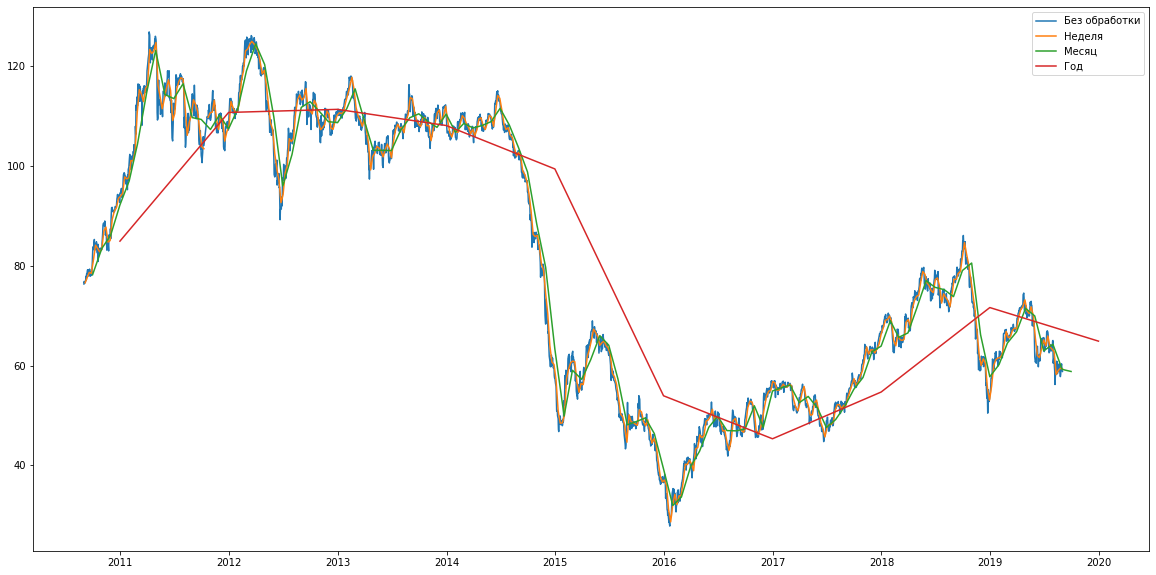

In [44]:
plt.figure(figsize=(20,10))
plt.plot(brent_data.index,brent_data['Значение'])
plt.plot(brent_data_week.index,brent_data_week['Значение'])
plt.plot(brent_data_month.index,brent_data_month['Значение'])
plt.plot(brent_data_year.index,brent_data_year['Значение'])
plt.legend(['Без обработки','Неделя', 'Месяц', 'Год'])
plt.show()

In [45]:
brent_data_week = brent_data.copy()
brent_data_week = brent_data_week.iloc[::-1]
brent_data_week = brent_data_week.resample("W").std()
brent_data_week.head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


In [46]:
brent_data_month = brent_data.copy()
brent_data_month = brent_data_month.iloc[::-1]
brent_data_month = brent_data_month.resample("M").std()
brent_data_month.head()

,Значение
Дата,
2010-09-30,1.294269
2010-10-31,0.898559
2010-11-30,1.753625
2010-12-31,1.443311
2011-01-31,1.842147


In [47]:
brent_data_year = brent_data.copy()
brent_data_year = brent_data_year.iloc[::-1]
brent_data_year = brent_data_year.resample("Y").std()
brent_data_year.head()

,Значение
Дата,
2010-12-31,5.269065
2011-12-31,7.021114
2012-12-31,7.777702
2013-12-31,4.014836
2014-12-31,14.512923


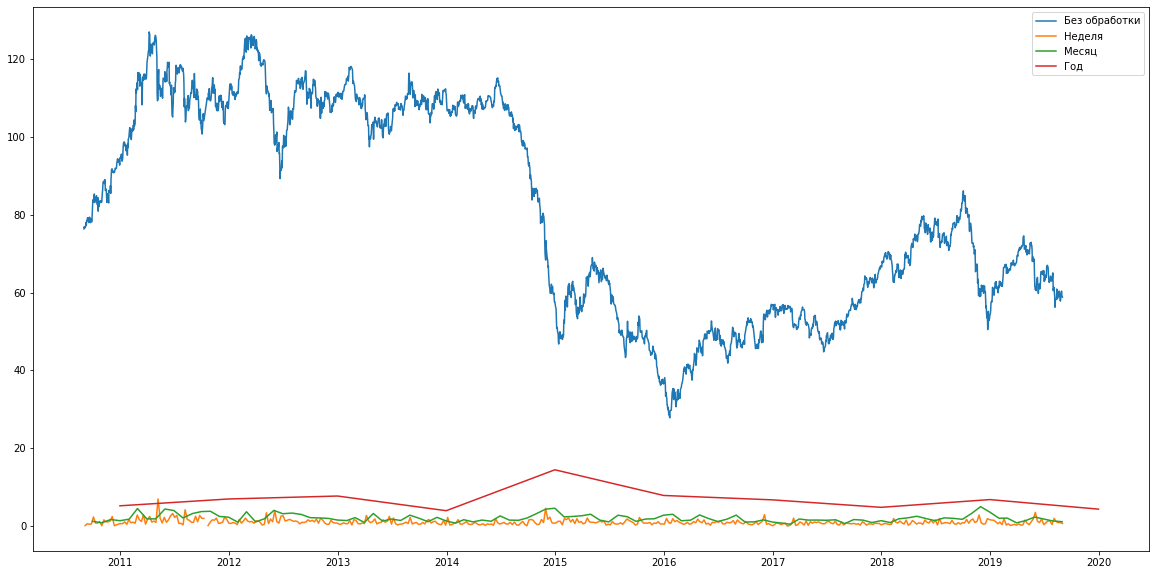

In [48]:
plt.figure(figsize=(20,10))
plt.plot(brent_data.index,brent_data['Значение'])
plt.plot(brent_data_week.index,brent_data_week['Значение'])
plt.plot(brent_data_month.index,brent_data_month['Значение'])
plt.plot(brent_data_year.index,brent_data_year['Значение'])
plt.legend(['Без обработки','Неделя', 'Месяц', 'Год'])
plt.show()

Вывод: график изменения std по выборке не дает полной картины происходящего

### 4
Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с годовыми и исходными дневными.
Вывод: недельные и месячные графики очень похожи на исходные, это говорит о том, что впринципе динамика цен менялась не так сильно с течением времени. Годовой график можно назвать своеообразной линией тренда, он показывает, как менялись цены и в каком направлении была динамика изменений (падала или опускалась) в течение года